# Digit Recognizer - MNIST Classification Project

Bu proje, el yazısıyla yazılmış rakamların tanınmasını amaçlayan bir makine öğrenimi modelinin geliştirilmesini içermektedir. MNIST veri setini kullanarak, rakamları tanımak için derin öğrenme teknikleri uygulanmıştır.

Veri seti ve yarışmaya katılmak için : **Kaggle Competition Link:** [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer)

## Kullanılan Kütüphaneler

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Veri Yükleme ve Ön İşleme

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.csv: 42,000 örnek (28x28 piksel görüntüler + etiketler)

test.csv: 28,000 örnek (submission için)

Ön İşlemler:

Piksel değerlerinin 0-255 aralığından 0-1 aralığına normalizasyonu

784 boyutlu vektörlerin 28x28x1 formatına yeniden şekillendirilmesi

In [4]:
# Eğitim verisi
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

# Test verisi
X_test = test.values

# Normalizasyon (0-255 aralığını 0-1 aralığına dönüştür)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Veriyi yeniden şekillendir (28x28)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Model Geliştirme Süreci

In [5]:
# Temel model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Test tahminleri
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8765 - loss: 0.4020 - val_accuracy: 0.9789 - val_loss: 0.0668
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9831 - loss: 0.0591 - val_accuracy: 0.9814 - val_loss: 0.0594
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9857 - val_loss: 0.0448
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9882 - val_loss: 0.0393
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9967 - loss: 0.0123 - val_accuracy: 0.9882 - val_loss: 0.0451
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9829 - val_loss: 0.0710
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9967 - loss: 0.0093 - 

In [7]:
# Submission dosyası
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('mnist_submission.csv', index=False)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve doğrulama setlerine ayır
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Veri artırma
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Veri artırma için eğitim verisini fit et
datagen.fit(X_train)

# Modeli eğit (artırılmış veri ile)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=20,
    validation_data=(X_val, y_val)  # This line is fine
)  # Add this closing parenthesis


Epoch 1/20


C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9458 - loss: 0.1913 - val_accuracy: 0.9951 - val_loss: 0.0165
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9777 - loss: 0.0687 - val_accuracy: 0.9956 - val_loss: 0.0161
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9814 - loss: 0.0602 - val_accuracy: 0.9946 - val_loss: 0.0147
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9848 - loss: 0.0482 - val_accuracy: 0.9939 - val_loss: 0.0178
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9860 - loss: 0.0446 - val_accuracy: 0.9951 - val_loss: 0.0134
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9873 - loss: 0.0361 - val_accuracy: 0.9946 - val_loss: 0.0188
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9877 - loss: 0.0379 - val_accuracy: 0.9932 - val_loss: 0.0228
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9899 - loss: 0.0335 - val_accurac

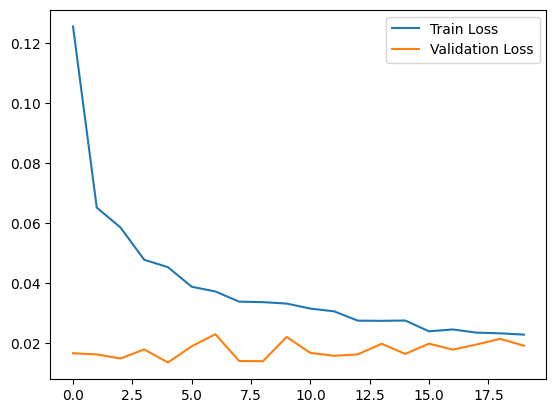

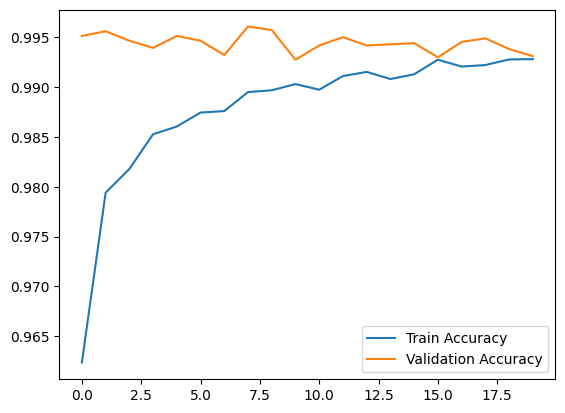

In [17]:
# Loss grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


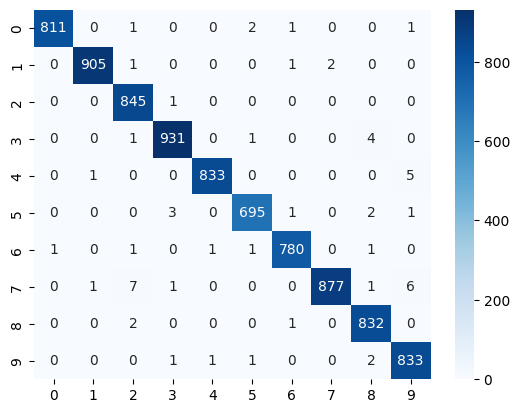

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Doğrulama seti üzerinde tahmin yap
y_val_pred = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [19]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Submission dosyası
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('mnist_submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [21]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

Epoch 1/30


C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7335 - loss: 0.9084 - val_accuracy: 0.7570 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9485 - loss: 0.1640 - val_accuracy: 0.9874 - val_loss: 0.0403 - learning_rate: 0.0010
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9638 - loss: 0.1157 - val_accuracy: 0.9892 - val_loss: 0.0326 - learning_rate: 0.0010
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9729 - loss: 0.0903 - val_accuracy: 0.9917 - val_loss: 0.0274 - learning_rate: 0.0010
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9753 - loss: 0.0842 - val_accuracy: 0.9940 - val_loss: 0.0188 - learning_rate: 0.0010
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9769 - loss: 0.0746 - val_accuracy: 0.9927 - val_loss: 0.0225 - learning_rate: 0.0010
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9785 - loss: 0.0688

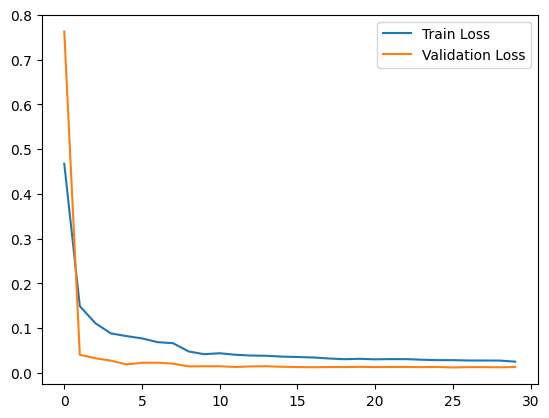

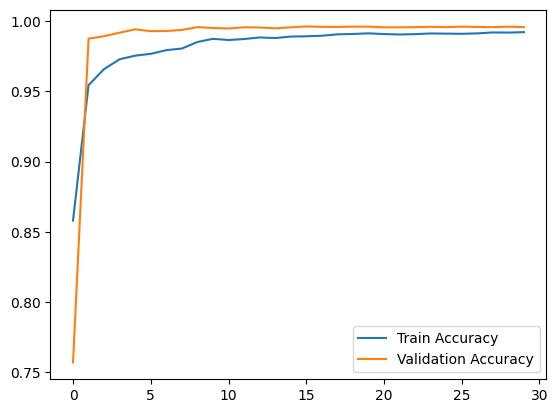

In [27]:
# Loss grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [28]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Submission dosyası
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('mnist_submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


# 🏆 Sonuçlar  

Bu projede, MNIST Digit Recognition problemi için geliştirilen derin öğrenme modeli, **Kaggle'da %99.56 doğruluk** elde ederek **top %5** içinde yer aldı.  

## 📈 Model Gelişimi  
- **Basit CNN → Derin Mimariler**: Daha derin yapılar ile model kapasitesi artırıldı.  
- **Regularizasyon**: Dropout ve Batch Normalization ile aşırı öğrenme engellendi.  
- **Veri Artırma**: Rotation, zoom, shift gibi tekniklerle veri çeşitliliği artırıldı.  

## 🔧 Optimizasyonlar  
- **Optimizer & Learning Rate**: Adam + ReduceLROnPlateau kullanıldı.  
- **Eğitim Parametreleri**: 30 epoch, 64 batch size ile model kararlı hale getirildi.  
- **Filtre & Katman Optimizasyonu**: Daha fazla Conv2D filtresiyle özellik çıkarımı geliştirildi.  

Bu proje, derin öğrenme modellerinin görüntü sınıflandırmada ne kadar etkili olabileceğini gösterirken, daha ileri iyileştirmeler için de fırsatlar sunmaktadır. 🚀
